In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [9]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df['Unnamed: 2'].count()

50

In [11]:
df['Unnamed: 3'].count()

12

In [12]:
df['Unnamed: 4'].count()

6

In [22]:
df = df.fillna(' ')

In [23]:
df['v2'] + df['Unnamed: 2'] + df['Unnamed: 3'] + df['Unnamed: 4']

0       Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...   
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568             Will �_ b going to esplanade fr home?   
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                        Rofl. Its true to its name   
Length: 5572, dtype: object

In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [25]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [27]:
target = df['v1'].values
target

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [28]:
target = np.where(target == 'ham', 1, 0)
target

array([1, 1, 0, ..., 1, 1, 1])

<AxesSubplot:ylabel='Count'>

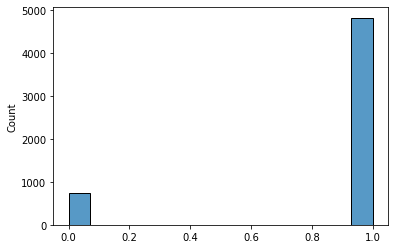

In [42]:
import seaborn as sns

sns.histplot(target)

In [31]:
df = df['v2']
df

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data = cv.fit_transform(df)

In [36]:
data

<5572x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 73734 stored elements in Compressed Sparse Row format>

In [37]:
data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
cross_val_score(lr, data, target).mean()

0.9809759200070847

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
cross_val_score(nb, data, target).mean()

0.9806170145961307

In [43]:
from sklearn.feature_extraction.text import  TfidfTransformer

tf = TfidfTransformer()
data = tf.fit_transform(data)
data

<5572x8625 sparse matrix of type '<class 'numpy.float64'>'
	with 73734 stored elements in Compressed Sparse Row format>

In [44]:
lr = LogisticRegression()
cross_val_score(lr, data, target).mean()

0.9612343512249317

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data = cv.fit_transform(df)

In [46]:
lr = LogisticRegression()
cross_val_score(lr, data, target).mean()

0.9784626160323965